<a href="https://colab.research.google.com/github/JihoonPark99/NLP_study/blob/main/_10_%EC%BC%80%EB%9D%BC%EC%8A%A4_Word2Vec_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 Word2Vec 구현

* 참고: https://wikidocs.net/69141

### 전처리

In [1]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
                                     #"s" 중요!!             #인용문들
documents = dataset.data
print(len(documents))
documents[0]                                                         

11314


"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [2]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(d):
  pattern = r'[^a-zA-Z\s]'
  text = re.sub(pattern, '', d)
  return text

def clean_stopwords(d):
  stop_words = stopwords.words('english')
  return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])

def tokenize(d):
  return word_tokenize(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
import pandas as pd

news_df = pd.DataFrame({'article' : documents})
len(news_df)

11314

In [4]:
news_df.replace("", float("NaN"), inplace=True) #Not a Number
news_df.dropna(inplace=True)
len(news_df)

11096

In [5]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article'][:5]

0    Well im not sure about the story nad it did se...
1    \n\n\n\n\n\n\nYeah do you expect people to rea...
2    Although I realize that principle is not one o...
3    Notwithstanding all the legitimate fuss about ...
4    Well I will have to change the scoring on my p...
Name: article, dtype: object

In [6]:
news_df['article'] = news_df['article'].apply(clean_stopwords)
news_df['article'][:5]

##소문자로 바뀌고, 불필요한 (어커스트로피)같은거 다 없애줌

0    well sure story seem biased what disagree stat...
1    yeah expect people read actually accept hard a...
2    although realize principle strongest points wo...
3    notwithstanding legitimate fuss proposal much ...
4    well change scoring playoff pool unfortunately...
Name: article, dtype: object

In [7]:
tokenized_news = news_df['article'].apply(tokenize)
tokenized_news = tokenized_news.to_list()
tokenized_news[:2]

[['well',
  'sure',
  'story',
  'seem',
  'biased',
  'what',
  'disagree',
  'statement',
  'media',
  'ruin',
  'israels',
  'reputation',
  'that',
  'rediculous',
  'media',
  'proisraeli',
  'media',
  'world',
  'having',
  'lived',
  'europe',
  'realize',
  'incidences',
  'described',
  'letter',
  'occured',
  'media',
  'whole',
  'seem',
  'ignore',
  'subsidizing',
  'israels',
  'existance',
  'europeans',
  'least',
  'degree',
  'think',
  'might',
  'reason',
  'report',
  'clearly',
  'atrocities',
  'what',
  'shame',
  'austria',
  'daily',
  'reports',
  'inhuman',
  'acts',
  'commited',
  'israeli',
  'soldiers',
  'blessing',
  'received',
  'government',
  'makes',
  'holocaust',
  'guilt',
  'away',
  'after',
  'look',
  'jews',
  'treating',
  'races',
  'power',
  'unfortunate'],
 ['yeah',
  'expect',
  'people',
  'read',
  'actually',
  'accept',
  'hard',
  'atheism',
  'need',
  'little',
  'leap',
  'faith',
  'jimmy',
  'your',
  'logic',
  'runs',
 

In [8]:
len(tokenized_news)

11096

In [ ]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news)
print(len(news_texts))

10939


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

news_2000 = news_texts[:2000]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_2000)

idx2word = {value:key for key, value in tokenizer.word_index.items()}
###key : value 형태를 value : key 형태로 바꾸기
sequences = tokenizer.texts_to_sequences(news_2000)


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size) #좀 줄여짐

29706


In [ ]:
print(sequences[1])

[1232, 443, 2, 56, 113, 405, 57, 1342, 20, 65, 3454, 384, 6822, 1142, 360, 2217, 444, 55, 12419, 444, 1862, 3804, 384, 20, 9, 4279, 8694, 171, 291, 130, 148, 648, 12420, 304, 12421, 14, 12422, 4, 770, 12423, 12424, 4870, 8695]


### Skipgram

#### Skipgram 전처리

* 네거티브 샘플링(Negative Sampling)

  + Word2Vec은 출력층이 내놓는 값에 소프트맥스 함수를 적용해 확률값으로 변환한 후 이를 정답과 비교해 역전파(backpropagation)
  + 소프트맥스를 적용하려면 분모에 해당하는 값, 즉 중심단어와 나머지 모든 단어의 내적을 한 뒤, 이를 다시 exp 계산을 하는데 전체 단어가 많을 경우 엄청난 계산량 발생
  + 네거티브 샘플링은 소프트맥스 확률을 구할 때 전체 단어를 대상으로 구하지 않고, 일부 단어만 뽑아서 계산을 하는 방식
  + 네거티브 샘플링 동작은 사용자가 지정한 윈도우 사이즈 내에 등장하지 않는 단어(negative sample)를 5~20개 정도 뽑고, 이를 정답단어와 합쳐 전체 단어처럼 소프트맥스 확률을 계산하여 파라미터 업데이트

이렇게 하면 정확도는 조금 떨어지더라도 확실히 계산량은 줄어들겠죠? 


In [ ]:
from tensorflow.keras.preprocessing.sequence import skipgrams

skip_grams = [skipgrams(smaple, vocabulary_size=vocab_size, window_size=10) for smaple in sequences[:10]]

In [ ]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]

for i in range(5):
  print("{:s}({:d}),{:s}({:d}) -> {:d}".format(
      idx2word[pairs[i][0]], pairs[i][0],
      idx2word[pairs[i][1]], pairs[i][1],
      labels[i]
  ))

realize(937),described(1231) -> 1
commited(4869),thrice(27412) -> 0
treating(3803),raises(7400) -> 0
degree(1397),subsidizing(8691) -> 1
media(483),europe(1604) -> 1


In [ ]:
print(len(skip_grams))
print(len(pairs))
print(len(labels))

10
2220
2220


In [ ]:

skip_grams = [skipgrams(smaple, vocabulary_size=vocab_size, window_size=10) for smaple in sequences]

#### Skipgram 모델 구성

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
from tensorflow.keras.utils import plot_model

In [ ]:
embed_size= 50

In [ ]:
def word2vec():
  ##타켓 가져오기 
  target_inputs = Input(shape=(1,), dtype='int32')
  target_embedding = Embedding(vocab_size, embed_size)(target_inputs)

  ##주변단어 가져오기
  context_inputs = Input(shape=(1,), dtype='int32')
  context_embedding = Embedding(vocab_size, embed_size)(context_inputs)

  ##Dot : 내적 계산
  dot_product = Dot(axes=2)([target_embedding, context_embedding])
  dot_product = Reshape((1,), input_shape=(1,1))(dot_product)
  output = Activation('sigmoid')(dot_product)

  model = Model(inputs=[target_inputs, context_inputs], outputs= output)
  model.compile(loss='binary_crossentropy', optimizer='adam')

  return model

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 50)        1485300     ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 50)        1485300     ['input_4[0][0]']                
                                                                                            

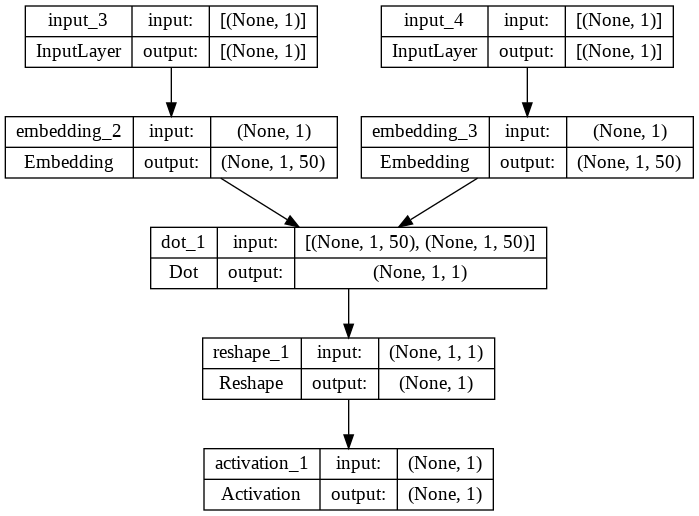

In [ ]:
model = word2vec()
model.summary()
plot_model(model, show_shapes=True, show_layer_names = True)

In [ ]:
for epoch in range(1, 11):
  loss = 0
  for _, elem in enumerate(skip_grams):
    first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
    second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
    labels = np.array(elem[1], dtype='int32')
    X = [first_elem, second_elem]
    Y = labels
    loss += model.train_on_batch(X,Y) #배치한번한번 X,Y넣으면서 에폭을 돌리고
    ###### 한번에 에폭에 여러번의 트레이닝을 거치고 
    ###### 이럴때마다 loss값을 추가한다

  print('Epoch : ', epoch, "Loss : ", loss)


Epoch :  1 Loss :  1227.0235922783613
Epoch :  2 Loss :  929.0478657186031
Epoch :  3 Loss :  831.6386879980564
Epoch :  4 Loss :  786.2541908472776
Epoch :  5 Loss :  760.0711326226592
Epoch :  6 Loss :  740.515368051827
Epoch :  7 Loss :  721.3056968003511
Epoch :  8 Loss :  698.820011369884
Epoch :  9 Loss :  671.3658069930971
Epoch :  10 Loss :  638.3474104143679


우리는 뉴스 일부만 사용
- 뉴스 전체 사용하고, 여러번 사용하면 loss값이 이렇게 나오진 않음.좋은 성능이 나올수 있음.

In [ ]:
## gensim에서 word2vec모델을 가져와서 테스트를 하자
## 텍스트로 좀 빼자
## 

import gensim

f = open('skipgram.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
  f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

skipgram = gensim.models.KeyedVectors.load_word2vec_format('skipgram.txt', binary=False)

In [ ]:
skipgram.most_similar(positive=['soldier'])

[('traps', 0.8901463150978088),
 ('retalliates', 0.8680451512336731),
 ('booby', 0.8401743769645691),
 ('ammunitions', 0.8071205019950867),
 ('israeli', 0.7403378486633301),
 ('indiscriminately', 0.7085849046707153),
 ('sneak', 0.698627769947052),
 ('patrols', 0.6910183429718018),
 ('pilots', 0.6750695109367371),
 ('countersteering', 0.6099787950515747)]

In [ ]:
skipgram.most_similar(positive=['world'])

[('firmly', 0.7083927392959595),
 ('beds', 0.696682870388031),
 ('establish', 0.6947639584541321),
 ('wider', 0.6796113848686218),
 ('angle', 0.6790615916252136),
 ('massacres', 0.6786090731620789),
 ('bleacher', 0.6711784601211548),
 ('suppress', 0.6680150032043457),
 ('brainwashed', 0.665738582611084),
 ('regolith', 0.6606431603431702)]

### CBOW


#### CBOW 전처리

In [ ]:
def skipgram2cbow(skipgrams):
  cbows = []
  flag = 0
  for n in skip_grams :
    temp1 = []
    for t in n :
      if flag == 1:
        flag = 0
        temp1.append(t) 
        ##flag가 1일땐 0으로 바궈주고, temp1에 t추가
      else :
        flag = 1
        temp2 = []
        for x in t :
          temp2.append([x[1], x[0]])
        temp1.append(temp2)
    cbows.append(temp1)
  return cbows

In [ ]:
cbows = skipgram2cbow(skip_grams)

In [ ]:
pairs, labels = cbows[0][0], cbows[0][1]

for i in range(5):
  print("{:s}({:d}),{:s}({:d}) -> {:d}".format(
      idx2word[pairs[i][0]], pairs[i][0],
      idx2word[pairs[i][1]], pairs[i][1],
      labels[i]
  ))

censored(20290),power(59) -> 0
rusting(17646),seem(167) -> 0
daily(1605),commited(4869) -> 1
reputation(5676),biased(2905) -> 1
likes(3344),commited(4869) -> 0


In [ ]:
print(len(cbows))
print(len(pairs))
print(len(labels))

2000
2220
2220


#### CBOW 모델 구성

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 1, 50)        1485300     ['input_5[0][0]']                
                                                                                                  
 embedding_5 (Embedding)        (None, 1, 50)        1485300     ['input_6[0][0]']                
                                                                                            

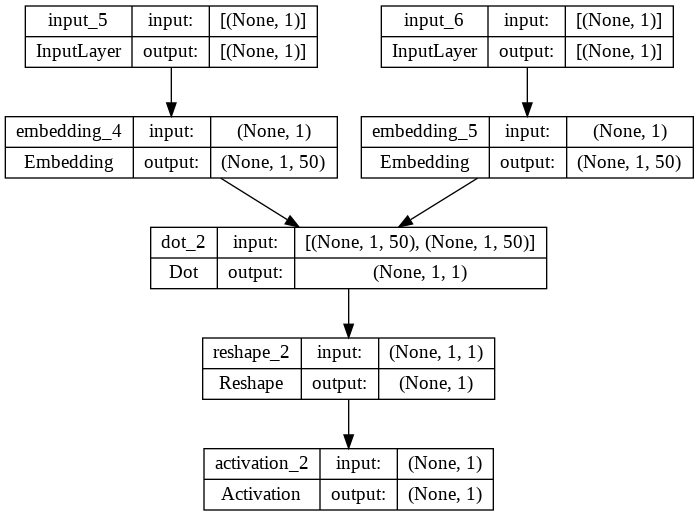

In [ ]:
model = word2vec()
model.summary()
plot_model(model, show_shapes=True, show_layer_names = True)

In [ ]:
for epoch in range(1, 11):
  loss = 0
  for _, elem in enumerate(cbows):
    first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
    second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
    labels = np.array(elem[1], dtype='int32')
    X = [first_elem, second_elem]
    Y = labels
    loss += model.train_on_batch(X,Y) #배치한번한번 X,Y넣으면서 에폭을 돌리고
    ###### 한번에 에폭에 여러번의 트레이닝을 거치고 
    ###### 이럴때마다 loss값을 추가한다

  print('Epoch : ', epoch, "Loss : ", loss)


Epoch :  1 Loss :  781.2465701848269
Epoch :  2 Loss :  754.7362570241094
Epoch :  3 Loss :  734.1845696642995
Epoch :  4 Loss :  713.3870072886348
Epoch :  5 Loss :  689.0229791775346
Epoch :  6 Loss :  659.6241365298629
Epoch :  7 Loss :  624.9743314534426
Epoch :  8 Loss :  586.648682301864
Epoch :  9 Loss :  546.6703280238435
Epoch :  10 Loss :  507.37727591977455


In [ ]:
import gensim

f = open('skipgram.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
  f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

cbows = gensim.models.KeyedVectors.load_word2vec_format('skipgram.txt', binary=False)

In [ ]:
cbows.most_similar(positive = ['soldier'])

[('traps', 0.9322865605354309),
 ('booby', 0.9300163984298706),
 ('sneak', 0.926967203617096),
 ('retalliates', 0.9155864119529724),
 ('sugared', 0.9080252647399902),
 ('shrapnel', 0.9077704548835754),
 ('undeclared', 0.9072073101997375),
 ('clementcolor', 0.9064816236495972),
 ('nationalist', 0.9059233665466309),
 ('sovereignty', 0.9048746824264526)]

In [ ]:
cbows.most_similar(positive=['world'])

[('ever', 0.9290981888771057),
 ('really', 0.9159550070762634),
 ('since', 0.9138662219047546),
 ('mean', 0.9054532051086426),
 ('post', 0.9041867852210999),
 ('time', 0.8989629149436951),
 ('problem', 0.8977533578872681),
 ('believe', 0.8953918814659119),
 ('dont', 0.8938876986503601),
 ('line', 0.8920932412147522)]